<a href="https://colab.research.google.com/github/AndreNobrega125/CP-1-Andr-/blob/main/cp1andre(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/household_power_consumption.txt', sep=';', low_memory=False)

In [5]:
df.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


2) a diferença entre as variáveis Global_active_power e Global_reactive_power é...

In [7]:
#checar no meu banco de dados se há espaços vazios
df.isnull().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979


In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Day_of_Week'] = df['Date'].dt.day_name()
display(df.head())

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day_of_Week
0,2006-12-16,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,Saturday
1,2006-12-16,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,Saturday
2,2006-12-16,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,Saturday
3,2006-12-16,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,Saturday
4,2006-12-16,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,Saturday


In [12]:
#  Filtre os registros apenas do ano de 2007 e calcule a média de consumo diário de Global_active_power
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce') #pela variável ser "object", ela não possuía valores numéricos, portanto tive que converter para numérico
df_2007 = df[df['Date'].dt.year == 2007]
media_consumo_diario = df_2007.groupby(df_2007['Date'].dt.date)['Global_active_power'].mean()

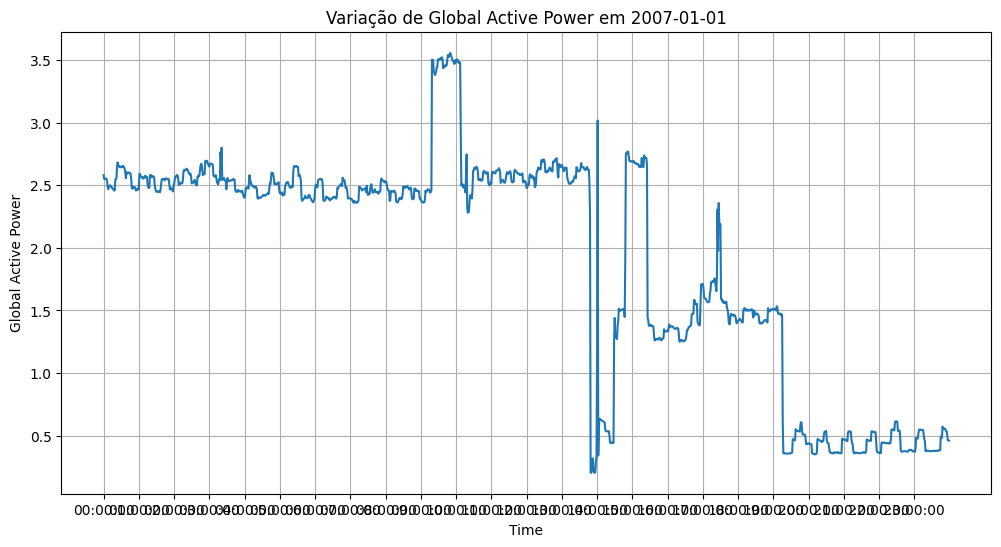

In [14]:
# Gere um gráfico de linha mostrando a variação de Global_active_power em um único dia à sua escolha.
dia_escolhido = pd.to_datetime('2007-01-01').date()
dados_dia = df_2007[df_2007['Date'].dt.date == dia_escolhido]

plt.figure(figsize=(12, 6))
plt.plot(dados_dia['Time'], dados_dia['Global_active_power'])
plt.xlabel('Time')
plt.ylabel('Global Active Power')
plt.title(f'Variação de Global Active Power em {dia_escolhido}')
plt.xticks(dados_dia['Time'][::60]) # Show every 60th tick for readability
plt.grid(True)
plt.show()

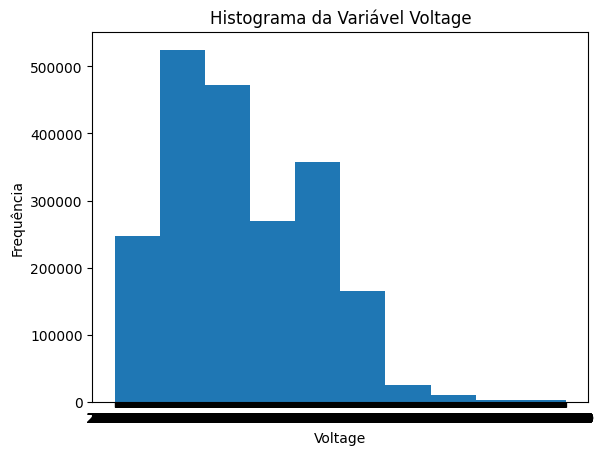

In [15]:
#  Crie um histograma da variável Voltage. O que pode ser observado sobre sua distribuição?
plt.hist(df['Voltage'], bins=10)
plt.xlabel('Voltage')
plt.ylabel('Frequência')
plt.title('Histograma da Variável Voltage')
plt.show()